In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "colorado_motor_vehicle_sales.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


Shape of the DataFrame: (501, 4)

Data types:
year        int64
quarter     int64
county     object
sales       int64
dtype: object

Missing values:
year       0
quarter    0
county     0
sales      0
dtype: int64

Summary statistics:
              year     quarter         sales
count   501.000000  501.000000  5.010000e+02
mean   2011.570858    2.502994  1.760585e+08
std       2.266599    1.120041  1.642055e+08
min    2008.000000    1.000000  6.274000e+06
25%    2010.000000    2.000000  6.148200e+07
50%    2012.000000    3.000000  1.385820e+08
75%    2014.000000    4.000000  2.241580e+08
max    2015.000000    4.000000  9.169100e+08



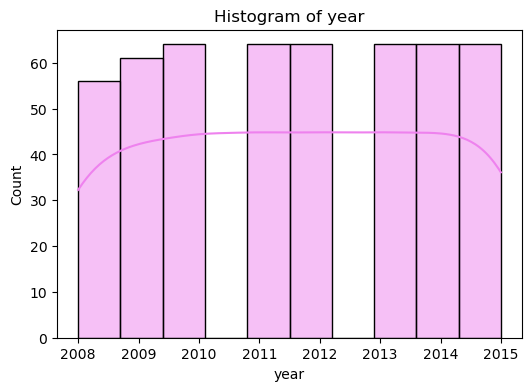

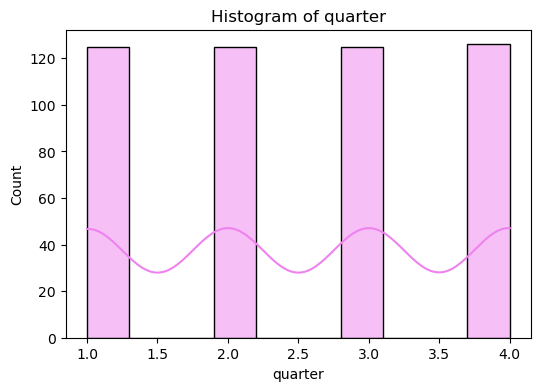

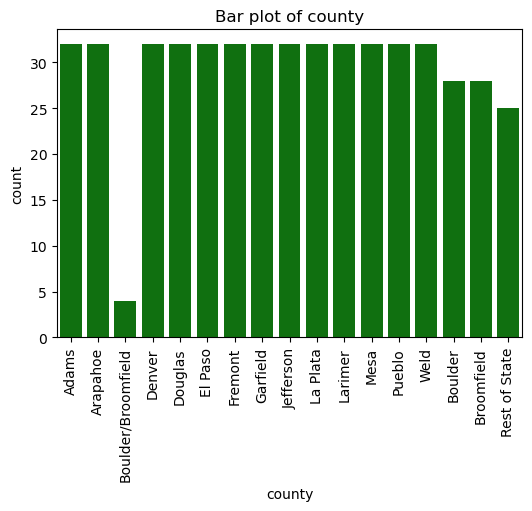

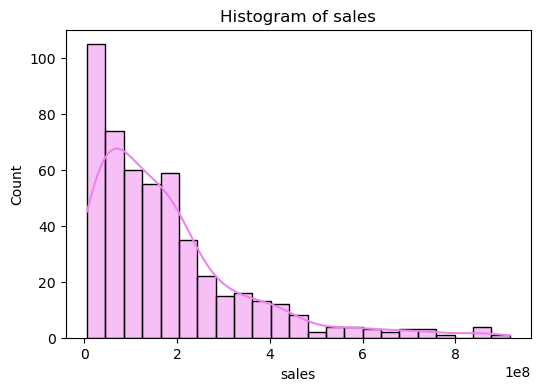

In [7]:
def perform_eda(df):
# Print the shape of the DataFrame
    print(f"Shape of the DataFrame: {df.shape}\n")

    # Print the data types of the DataFrame
    print(f"Data types:\n{df.dtypes}\n")

    # Check for missing values
    print(f"Missing values:\n{df.isnull().sum()}\n")

    # Summary statistics
    print(f"Summary statistics:\n{df.describe()}\n")

    # For each column
    for column in df.columns:
    # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Plot a histogram
            plt.figure(figsize=(6, 4))
            sns.histplot(data=df, x=column, kde=True, color ='violet')
            plt.title(f"Histogram of {column}")
            plt.show()

        # Check if the column is object type
        elif df[column].dtype == 'object':
            # Plot a bar plot
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x=column, color='green')

            plt.title(f"Bar plot of {column}")
            plt.xticks(rotation=90)
            plt.show()
perform_eda(df)

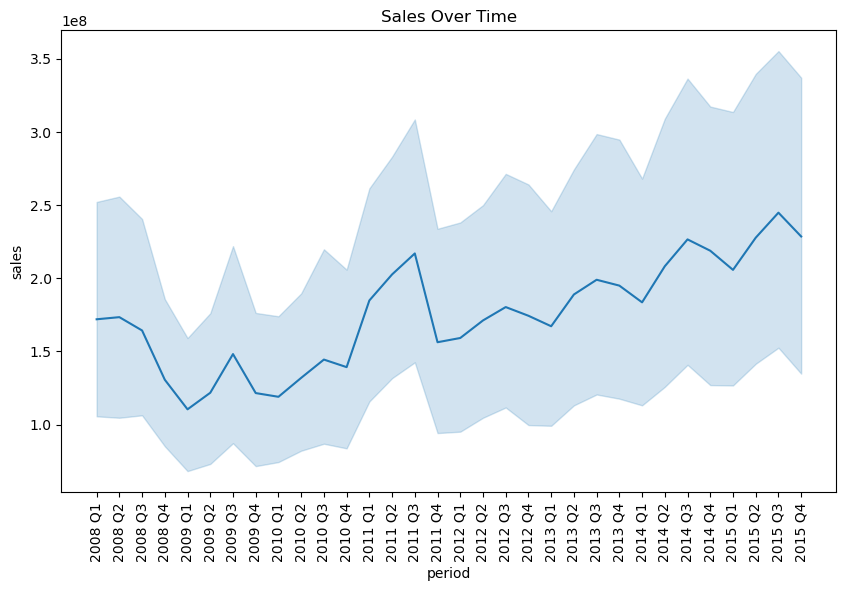

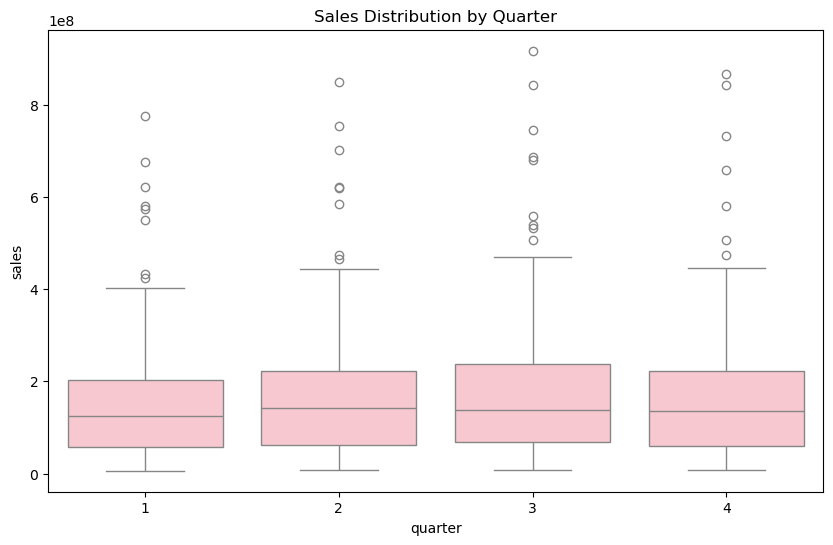

In [8]:
# Create a new column that represents the year and quarter
df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

# Time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='period', y='sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()

# Box plot by quarter

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quarter', y='sales', color='pink')
plt.title('Sales Distribution by Quarter')
plt.show()

In [9]:
import ipywidgets as widgets

def plot_sales_by_county(df, year, quarter):
  # Filter the DataFrame for the selected year and quarter
  filtered_df = df[(df['year'] == year) & (df['quarter'] ==
  quarter)]

  # Group the data by county and sum the sales
  county_sales = filtered_df.groupby('county')['sales'].sum().reset_index()

  # Sort the counties by sales
  county_sales_sorted = county_sales.sort_values('sales',ascending=False)

  # Create the bar plot
  plt.figure(figsize=(12, 6))
  sns.barplot(data=county_sales_sorted, x='county',
  y='sales',hue = 'county', palette='viridis')
  plt.title(f'Sales by County for {year} Q{quarter}')
  plt.xticks(rotation=90)
  plt.ylabel('Total Sales')
  plt.xlabel('County')
  plt.show()

# Create widgets for year and quarter selection
# This code relies on df being defined
year_widget = widgets.IntSlider(min=df['year'].min(), max=df['year'].max(), step=1, description='Year:')
quarter_widget = widgets.IntSlider(min=df['quarter'].min(), max=df['quarter'].max(), step=1, description='Quarter:')

# Use the interact function to create the interactive plot
widgets.interact(lambda year, quarter: plot_sales_by_county(df, year, quarter), year=year_widget, quarter=quarter_widget)

interactive(children=(IntSlider(value=2008, description='Year:', max=2015, min=2008), IntSlider(value=1, descr…

<function __main__.<lambda>(year, quarter)>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Convert 'county' column to categorical
df['county'] = df['county'].astype('category').cat.codes

# Define features and target
X = df[['year', 'quarter', 'county']]
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100,

random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 20402876.97387048


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],

'min_samples_split': [2, 5, 10]
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=5,
scoring='neg_root_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Fit the model with the best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 19981856.206187755
